Needs to be implemented:

* alignment-baseline

In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = """<span>This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>, <span style="font-size:24px">large</span>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your amusement!</span>"""
#text = "Hello, <small>World!</small>"
style = {"font-family":"helvetica", "font-size":"16px", "text-anchor":"start"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [3]:
toyplot.text.dump(layout)

toyplot.text.Layout
  height: 86.4
  width: 191.8544

  toyplot.text.LineBox
    ascent: 13.688
    baseline: 13.688
    bottom: 19.2
    descent: -5.512
    height: 19.2
    left: 0
    right: 129.792
    top: 0
    width: 129.792

    toyplot.text.TextBox
      ascent: 13.688
      baseline: 13.688
      bottom: 19.2
      descent: -5.512
      height: 19.2
      left: 0
      right: 50.672
      style:
        font-size: 16.0
        vertical-align: baseline
        font-family: helvetica
        line-height: 19.2
      text: 'This is '
      top: 0.0
      width: 50.672

    toyplot.text.TextBox
      ascent: 13.688
      baseline: 13.688
      bottom: 19.2
      descent: -5.512
      height: 19.2
      left: 50.672
      right: 82.672
      style:
        font-size: 16.0
        vertical-align: baseline
        font-style: italic
        font-family: helvetica
        line-height: 19.2
      text: 'italic'
      top: 0.0
      width: 32.0

    toyplot.text.TextBox
      ascent: 13

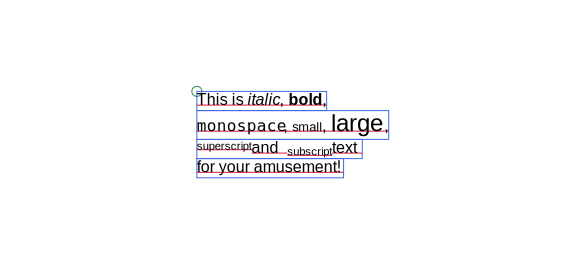

In [4]:
def draw(box, image, show_anchor=True, show_line_box=True, show_line_baseline=False, show_text_box=False, show_text_baseline=True):
    if isinstance(box, toyplot.text.Layout):
        if show_anchor:
            xml.SubElement(
                image,
                "circle",
                cx="0",
                cy="0",
                r="5",
                fill="none",
                stroke="seagreen",
            )

    if isinstance(box, toyplot.text.LineBox):
        if show_line_box:
            xml.SubElement(
                image,
                "rect",
                x=str(box.left),
                y=str(box.top),
                width=str(box.width),
                height=str(box.height),
                fill="none",
                stroke="royalblue",
            )
            
        if show_line_baseline:
            xml.SubElement(
                image,
                "line",
                x1=str(box.left),
                y1=str(box.baseline),
                x2=str(box.right),
                y2=str(box.baseline),
                stroke="royalblue")

            
        
    if isinstance(box, toyplot.text.TextBox):
        if show_text_box:
            xml.SubElement(
                image,
                "rect",
                x=str(box.left),
                y=str(box.top),
                width=str(box.width),
                height=str(box.height),
                fill="none",
                stroke="crimson",
            )
        
        if show_text_baseline:
            xml.SubElement(
                image,
                "line",
                x1=str(box.left),
                y1=str(box.baseline),
                x2=str(box.right),
                y2=str(box.baseline),
                stroke="crimson")
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
       
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.baseline),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.width*3)),
    height=str(int(layout.height*3)),
    style="border: 1px solid #f0f0f0",
)
group = xml.SubElement(
    image,
    "g",
    transform="translate(%s %s)" % (layout.width + 5, layout.height + 5),
)

draw(layout, group)
IPython.display.SVG(xml.tostring(image))

In [5]:
IPython.display.HTML("<span style='text-anchor: middle; font-family: helvetica; font-size: 16px'>%s</span>" % text)

In [6]:
layout.__dict__.items()

[('width', 191.85440000000006),
 ('children',
   <toyplot.text.LineBox at 0x10e733090>]),
 ('height', 86.399999999999991)]